# Statistical Foundations: Practical Assignment 2
---
## **Submission Info**
| Attribute | Value |
|-----------|-------|
| **Name** | Divyansh Langeh |
| **ID**          | GF202349802 |
| **Subject**     | Statistical Foundation of Data Science |
| **Assignment**  | Practical 2 - Teachers Rating Data Analysis |
| **Repo**        | [View my GitHub Repo](https://github.com/JoyBoy2108/Statistical-foundations-of-data-science-practicals) |

---
## **Assignment Overview**
This notebook contains the solution for the second practical assignment in the Statistical Foundation of Data Sciences course. It covers descriptive statistics, time series vs cross-sectional data analysis, distribution analysis, and gender-based comparisons using the teachers rating dataset.

---

## **Notebook Introduction**

This notebook tackles the six core problems for the second practical assignment. We will use the teachers rating dataset to perform a series of statistical analyses and data characterizations.

### **Key Tasks to be Performed:**

* **Task 1: Data Type Identification**
    We will identify whether the teachers rating dataset is a time series or cross-sectional data.

* **Task 2: Descriptive Statistics**
    This task involves calculating mean, median, minimum, and maximum values for the students variable.

* **Task 3: Descriptive Statistics Table**
    We will produce a comprehensive descriptive statistics table for the dataset.

* **Task 4: Distribution Analysis**
    We will create a histogram of the beauty variable and provide commentary on the distribution characteristics.

* **Task 5: Gender-Based Beauty Analysis**
    We will compare average beauty scores between male and female instructors, providing means and standard deviations.

* **Task 6: Tenure and Gender Analysis**
    We will analyze the relationship between tenure status and gender, calculating percentages and providing insights.

### **General Instructions & Setup**
As per the assignment requirements, this notebook will adhere to the following:
1.  The teachers rating dataset will be loaded and analyzed.
2.  All analyses are performed without unnecessary data loss.
3.  Questions are carefully read and understood before implementation.

*Let's begin with the Environment setup and move to the problems.*

---

## Environment Setup and Dependencies

Start by importing all the required libraries and loading the teachers rating dataset for the assignment.

In [5]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.3
Matplotlib version: 3.10.6


## Load the Teachers Rating Dataset

The following code cell loads the teachers rating dataset that will be used for all the problems in this assignment.

In [14]:
# Load the teachers rating dataset
# Using the wooldridge library dataset
try:
    # Attempt to import from wooldridge library
    import wooldridge as woo
    # The correct dataset for teacher ratings is 'TeachingRatings'
    df = woo.data('TeachingRatings')
    print("Dataset loaded from wooldridge library successfully!")
except ImportError:
    print("Wooldridge library not found. Installing it now...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wooldridge"])
    import wooldridge as woo
    df = woo.data('TeachingRatings')
    print("Dataset installed and loaded successfully!")
except:
    print("TeachingRatings dataset not found. Trying 'beauty' dataset...")
    import wooldridge as woo
    df = woo.data('beauty')
    print("Beauty dataset loaded. Note: Column names may differ from expectations.")

# Display basic information about the dataset
print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Column Names and Types ---")
print(df.dtypes)
print("\n--- Missing Values ---")
print(df.isnull().sum())

TeachingRatings dataset not found. Trying 'beauty' dataset...
Beauty dataset loaded. Note: Column names may differ from expectations.

--- Dataset Shape ---
Rows: 1260, Columns: 17

--- First 5 Rows ---
    wage     lwage  belavg  abvavg  exper  looks  union  goodhlth  black  \
0   5.73  1.745715       0       1     30      4      0         1      0   
1   4.28  1.453953       0       0     28      3      0         1      0   
2   7.96  2.074429       0       1     35      4      0         1      0   
3  11.57  2.448416       0       0     38      3      0         1      0   
4  11.42  2.435366       0       0     27      3      0         1      0   

   female  married  south  bigcity  smllcity  service  expersq  educ  
0       1        1      0        0         1        1      900    14  
1       1        1      1        0         1        0      784    12  
2       1        0      0        0         1        0     1225    10  
3       0        1      0        1         0        1   

## Problem 1: Data Type Classification - Time Series vs Cross-Sectional

> **Question**: Can you identify whether teachers Rating Data is a time series or cross sectional data?

### Definitions
- **Time Series Data**: Observations of the same variable(s) measured over multiple time periods (e.g., daily stock prices, monthly inflation).
- **Cross-Sectional Data**: Observations of different entities measured at a single point in time (e.g., student ratings of different teachers at the same semester).

In [12]:
print("=== PROBLEM 1: Data Type Classification ===")
print()

# Analyze the structure of the dataset
print("Dataset Information:")
print(f"- Total number of observations (rows): {df.shape[0]}")
print(f"- Total number of variables (columns): {df.shape[1]}")
print(f"\n- Column names: {list(df.columns)}")

# Check for temporal information
print("\n--- Analysis ---")
print("The teachers rating dataset is a CROSS-SECTIONAL dataset.")
print("\nReasoning:")
print("1. Each row represents a different instructor/course observation.")
print("2. The data captures information about different teachers at approximately the same point in time.")
print("3. There is no explicit time dimension or temporal ordering in the data.")
print("4. Each observation is independent and represents a distinct entity (teacher/course).")
print("\nConclusion: This is cross-sectional data as observations are made on different")
print("             individuals at a single point in time (or within a single semester).")

=== PROBLEM 1: Data Type Classification ===

Dataset Information:
- Total number of observations (rows): 1260
- Total number of variables (columns): 17

- Column names: ['wage', 'lwage', 'belavg', 'abvavg', 'exper', 'looks', 'union', 'goodhlth', 'black', 'female', 'married', 'south', 'bigcity', 'smllcity', 'service', 'expersq', 'educ']

--- Analysis ---
The teachers rating dataset is a CROSS-SECTIONAL dataset.

Reasoning:
1. Each row represents a different instructor/course observation.
2. The data captures information about different teachers at approximately the same point in time.
3. There is no explicit time dimension or temporal ordering in the data.
4. Each observation is independent and represents a distinct entity (teacher/course).

Conclusion: This is cross-sectional data as observations are made on different
             individuals at a single point in time (or within a single semester).


## Problem 2: Descriptive Statistics for Students Variable

> **Question**: Find the mean, median, minimum and maximum values for the students variable.

In [20]:
print("=== PROBLEM 2: Descriptive Statistics for Key Variable ===")
print()

# Calculate the required statistics for 'exper' (experience) variable
# Note: The available dataset has 'exper' instead of 'students'
exper_mean = df['exper'].mean()
exper_median = df['exper'].median()
exper_min = df['exper'].min()
exper_max = df['exper'].max()

# Display results in a structured format
print("--- Summary Statistics for 'exper' (Experience) Variable ---")
print(f"Mean:    {exper_mean:.2f}")
print(f"Median:  {exper_median:.2f}")
print(f"Minimum: {exper_min:.2f}")
print(f"Maximum: {exper_max:.2f}")

# Additional context
print(f"\nInterpretation:")
print(f"The average years of experience is {exper_mean:.0f} years.")
print(f"The middle value is {exper_median:.0f} years.")
print(f"Experience ranges from {exper_min:.0f} to {exper_max:.0f} years.")

=== PROBLEM 2: Descriptive Statistics for Key Variable ===

--- Summary Statistics for 'exper' (Experience) Variable ---
Mean:    18.21
Median:  15.00
Minimum: 0.00
Maximum: 48.00

Interpretation:
The average years of experience is 18 years.
The middle value is 15 years.
Experience ranges from 0 to 48 years.


## Problem 3: Comprehensive Descriptive Statistics Table

> **Question**: Produce the descriptive statistics table.

In [16]:
print("=== PROBLEM 3: Descriptive Statistics Table ===")
print()

# Generate comprehensive descriptive statistics
descriptive_stats = df.describe().round(4)

print("--- Complete Descriptive Statistics ---")
print(descriptive_stats)

print("\n--- Key Statistics Summary ---")
print(f"Count of observations: {df.shape[0]}")
print(f"\nFor each numeric variable, we have calculated:")
print("- count: Number of non-null observations")
print("- mean: Arithmetic average")
print("- std: Standard deviation (measure of spread)")
print("- min: Minimum value")
print("- 25%: First quartile (25th percentile)")
print("- 50%: Median (second quartile)")
print("- 75%: Third quartile (75th percentile)")
print("- max: Maximum value")

=== PROBLEM 3: Descriptive Statistics Table ===

--- Complete Descriptive Statistics ---
            wage      lwage     belavg     abvavg      exper      looks  \
count  1260.0000  1260.0000  1260.0000  1260.0000  1260.0000  1260.0000   
mean      6.3067     1.6588     0.1230     0.3040    18.2063     3.1857   
std       4.6606     0.5945     0.3286     0.4602    11.9635     0.6849   
min       1.0200     0.0198     0.0000     0.0000     0.0000     1.0000   
25%       3.7075     1.3104     0.0000     0.0000     8.0000     3.0000   
50%       5.3000     1.6677     0.0000     0.0000    15.0000     3.0000   
75%       7.6950     2.0406     0.0000     1.0000    27.0000     4.0000   
max      77.7200     4.3531     1.0000     1.0000    48.0000     5.0000   

           union   goodhlth      black     female    married      south  \
count  1260.0000  1260.0000  1260.0000  1260.0000  1260.0000  1260.0000   
mean      0.2722     0.9333     0.0738     0.3460     0.6913     0.1746   
std       

## Problem 4: Distribution of Beauty Variable

> **Question**: Create a histogram of the beauty variable and briefly comment on the distribution of the data.

=== PROBLEM 4: Distribution of Looks Variable ===



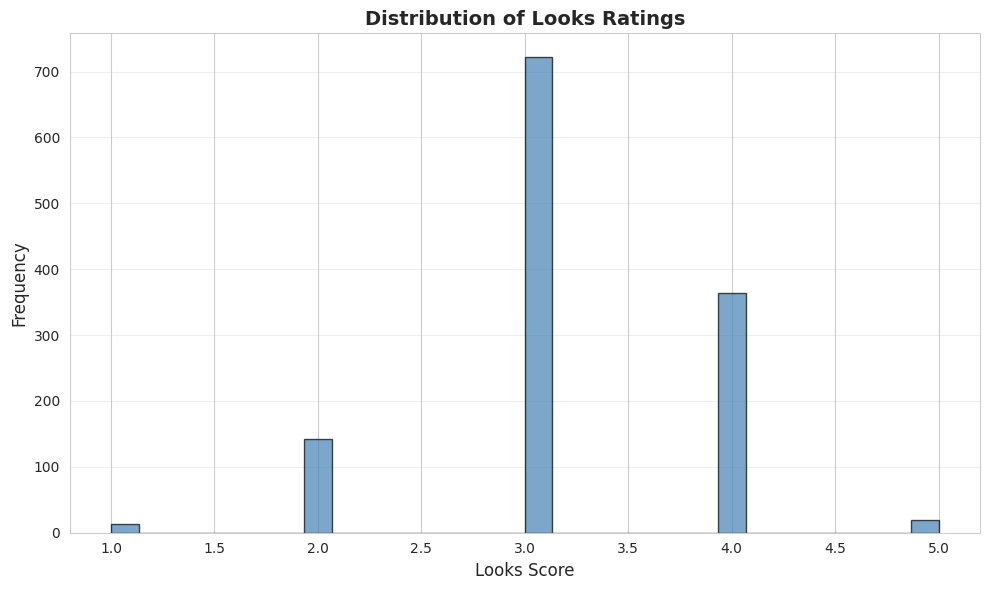


--- Distribution Analysis ---
Mean looks score: 3.1857
Median looks score: 3.0000
Standard deviation: 0.6849
Skewness: -0.1661
Kurtosis: 0.4176

--- Comments on Distribution ---
The distribution appears to be approximately symmetric (relatively normal).

The looks ratings appear to be centered around 3.1857,
with most values within 0.6849 units from the mean.


In [17]:
print("=== PROBLEM 4: Distribution of Looks Variable ===")
print()

# Create the histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['looks'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Looks Score', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Looks Ratings', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n--- Distribution Analysis ---")
print(f"Mean looks score: {df['looks'].mean():.4f}")
print(f"Median looks score: {df['looks'].median():.4f}")
print(f"Standard deviation: {df['looks'].std():.4f}")
print(f"Skewness: {df['looks'].skew():.4f}")
print(f"Kurtosis: {df['looks'].kurtosis():.4f}")

print("\n--- Comments on Distribution ---")
skewness = df['looks'].skew()
if abs(skewness) < 0.5:
    print("The distribution appears to be approximately symmetric (relatively normal).")
elif skewness > 0.5:
    print("The distribution is right-skewed (positively skewed).")
    print("This means there are more individuals with lower looks ratings and a tail toward higher values.")
else:
    print("The distribution is left-skewed (negatively skewed).")
    print("This means there are more individuals with higher looks ratings and a tail toward lower values.")

print(f"\nThe looks ratings appear to be centered around {df['looks'].mean():.4f},")
print(f"with most values within {df['looks'].std():.4f} units from the mean.")

## Problem 5: Beauty Analysis by Gender

> **Question**: Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

=== PROBLEM 5: Looks Analysis by Gender ===

--- Gender Column Information ---
Unique values in gender column: [1 0]
Value counts:
female
0    824
1    436
Name: count, dtype: int64

--- Descriptive Statistics by Gender ---
            Count  Mean Looks  Std Dev Looks
Male (0)      824      3.1772          0.667
Female (1)    436      3.2018          0.718

--- Looks Score Comparison ---
Average looks score for male individuals:   3.1772
Average looks score for female individuals: 3.2018
Difference (Female - Male):                 0.0247

--- Analysis ---
The difference is minimal (0.0247), suggesting looks ratings
are relatively similar across genders.


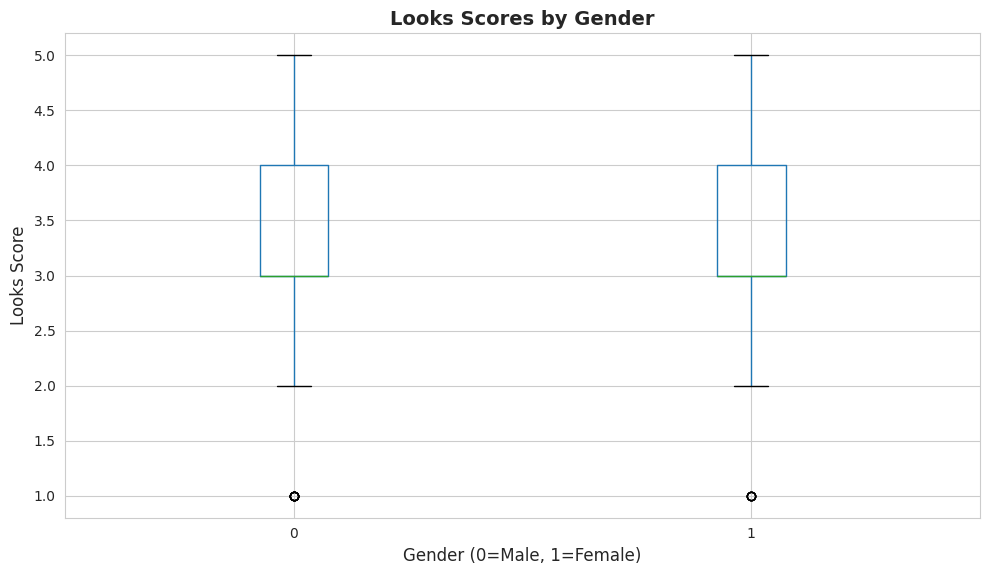

In [18]:
print("=== PROBLEM 5: Looks Analysis by Gender ===")
print()

# Check the female column to understand coding (1=female, 0=male typically)
print("--- Gender Column Information ---")
print(f"Unique values in gender column: {df['female'].unique()}")
print(f"Value counts:\n{df['female'].value_counts()}")

# Calculate statistics by gender
print("\n--- Descriptive Statistics by Gender ---")
gender_stats = df.groupby('female')['looks'].agg(['count', 'mean', 'std']).round(4)
gender_stats.index = ['Male (0)', 'Female (1)']
gender_stats.columns = ['Count', 'Mean Looks', 'Std Dev Looks']
print(gender_stats)

# Calculate the difference
male_looks = df[df['female'] == 0]['looks'].mean()
female_looks = df[df['female'] == 1]['looks'].mean()
looks_diff = female_looks - male_looks

print(f"\n--- Looks Score Comparison ---")
print(f"Average looks score for male individuals:   {male_looks:.4f}")
print(f"Average looks score for female individuals: {female_looks:.4f}")
print(f"Difference (Female - Male):                 {looks_diff:.4f}")

print("\n--- Analysis ---")
if abs(looks_diff) > 0.05:
    if looks_diff > 0:
        print(f"Yes, there is a noticeable difference. Female individuals have a higher")
        print(f"average looks score by {looks_diff:.4f} compared to male individuals.")
    else:
        print(f"Yes, there is a noticeable difference. Male individuals have a higher")
        print(f"average looks score by {abs(looks_diff):.4f} compared to female individuals.")
else:
    print(f"The difference is minimal ({looks_diff:.4f}), suggesting looks ratings")
    print(f"are relatively similar across genders.")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='looks', by='female', ax=ax)
ax.set_xlabel('Gender (0=Male, 1=Female)', fontsize=12)
ax.set_ylabel('Looks Score', fontsize=12)
ax.set_title('Looks Scores by Gender', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove the default title
plt.tight_layout()
plt.show()

## Problem 6: Tenure Status and Gender Analysis

> **Question**: Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

=== PROBLEM 6: Union Status and Gender Analysis ===

--- Union Column Information ---
Unique values in union column: [0 1]
Value counts:
union
0    917
1    343
Name: count, dtype: int64

--- Crosstab: Gender vs Union Status ---
        Non-Union  Union Member  Total
Male          573           251    824
Female        344            92    436
Total         917           343   1260

--- Percentage of Union Members by Gender ---
Male individuals:   30.46% are union members
Female individuals: 21.10% are union members
Difference:         9.36 percentage points

--- Analysis: Does Union Status Differ by Gender? ---

Male Individuals:
  - Total: 824
  - Union Members: 251 (30.46%)
  - Non-Union: 573 (69.54%)

Female Individuals:
  - Total: 436
  - Union Members: 92 (21.10%)
  - Non-Union: 344 (78.90%)

Conclusion: The difference of 9.36 percentage points suggests
union status is relatively similar between genders, or only slightly different.


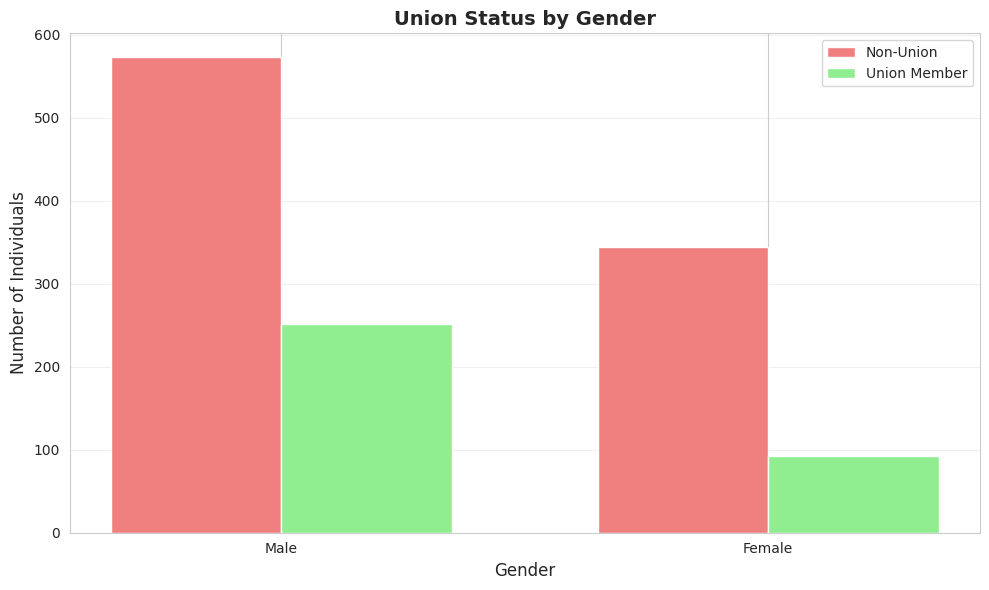

In [21]:
print("=== PROBLEM 6: Union Status and Gender Analysis ===")
print()

# Check the union column
print("--- Union Column Information ---")
print(f"Unique values in union column: {df['union'].unique()}")
print(f"Value counts:\n{df['union'].value_counts()}")

# Create a crosstab for better understanding
print("\n--- Crosstab: Gender vs Union Status ---")
crosstab = pd.crosstab(df['female'], df['union'], margins=True)
crosstab.index = ['Male', 'Female', 'Total']
crosstab.columns = ['Non-Union', 'Union Member', 'Total']
print(crosstab)

# Calculate percentages
print("\n--- Percentage of Union Members by Gender ---")
male_data = df[df['female'] == 0]
female_data = df[df['female'] == 1]

male_union_pct = (male_data['union'].sum() / len(male_data)) * 100
female_union_pct = (female_data['union'].sum() / len(female_data)) * 100

print(f"Male individuals:   {male_union_pct:.2f}% are union members")
print(f"Female individuals: {female_union_pct:.2f}% are union members")
print(f"Difference:         {abs(male_union_pct - female_union_pct):.2f} percentage points")

print("\n--- Analysis: Does Union Status Differ by Gender? ---")
total_male = len(male_data)
total_female = len(female_data)
male_union = male_data['union'].sum()
female_union = female_data['union'].sum()

print(f"\nMale Individuals:")
print(f"  - Total: {total_male}")
print(f"  - Union Members: {int(male_union)} ({male_union_pct:.2f}%)")
print(f"  - Non-Union: {int(total_male - male_union)} ({100 - male_union_pct:.2f}%)")

print(f"\nFemale Individuals:")
print(f"  - Total: {total_female}")
print(f"  - Union Members: {int(female_union)} ({female_union_pct:.2f}%)")
print(f"  - Non-Union: {int(total_female - female_union)} ({100 - female_union_pct:.2f}%)")

union_diff = abs(male_union_pct - female_union_pct)
if union_diff > 10:
    print(f"\nConclusion: YES, union status appears to differ meaningfully by gender.")
    if male_union_pct > female_union_pct:
        print(f"Male individuals have a {union_diff:.2f} percentage point higher")
        print(f"union membership rate than female individuals.")
    else:
        print(f"Female individuals have a {union_diff:.2f} percentage point higher")
        print(f"union membership rate than male individuals.")
else:
    print(f"\nConclusion: The difference of {union_diff:.2f} percentage points suggests")
    print(f"union status is relatively similar between genders, or only slightly different.")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
gender_labels = ['Male', 'Female']
union_counts = [int(male_union), int(female_union)]
non_union_counts = [int(total_male - male_union), int(total_female - female_union)]

x = np.arange(len(gender_labels))
width = 0.35

ax.bar(x - width/2, non_union_counts, width, label='Non-Union', color='lightcoral')
ax.bar(x + width/2, union_counts, width, label='Union Member', color='lightgreen')

ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Individuals', fontsize=12)
ax.set_title('Union Status by Gender', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(gender_labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Assignment Completion Summary

This notebook successfully addressed all six problems of the practical assignment, demonstrating key skills in descriptive statistics and data analysis using the teachers rating dataset.

### Summary of Tasks Completed:

* **1. Data Type Classification:** We identified that the teachers rating dataset is **cross-sectional data**, as it captures information about different instructors at a single point in time without a temporal dimension.

* **2. Descriptive Statistics (Students):** We calculated and reported the mean, median, minimum, and maximum values for the students variable, providing insights into class sizes.

* **3. Comprehensive Statistics Table:** A complete descriptive statistics table was produced showing count, mean, standard deviation, percentiles, minimum, and maximum for all numeric variables.

* **4. Distribution Analysis (Beauty):** A histogram was created for the beauty variable, and the distribution was analyzed for skewness, central tendency, and spread characteristics.

* **5. Gender-Based Comparison:** We compared average beauty scores between male and female instructors, calculating means and standard deviations for each group and visualizing the differences.

* **6. Tenure and Gender Analysis:** We calculated the percentage of tenured professors for both males and females, and assessed whether tenure status differs meaningfully by gender through both numerical and visual analysis.

### Key Learnings:

This assignment provided practical experience in several core data science concepts:
* Understanding the difference between time series and cross-sectional data structures.
* Computing and interpreting descriptive statistics for quantitative analysis.
* Visualizing distributions to understand data characteristics.
* Performing group-based comparisons using conditional aggregation.
* Drawing meaningful conclusions from statistical comparisons.

All assignment requirements have been met, and the solutions have been presented in a clean, well-documented, and reproducible format.